# Which species show the most significant changes in observation frequency over the years?

In [1]:
import pandas as pd
import matplotlib.pyplot as mpl
import numpy as np
import seaborn as sb

In [ ]:
df = pd.read_csv("<Path>0035785-251025141854904.csv",
sep="\t",
skiprows=1,
names=[
    "species","specieskey","year","month","countrycode","occurences"
])

In [3]:
df.isna().sum()

species        0
specieskey     0
year           0
month          0
countrycode    0
occurences     0
dtype: int64

In [4]:
df.head()

,species,specieskey,year,month,countrycode,occurences
0,Phasianus colchicus,9752149,2024,5,DE,1770
1,Cyanistes caeruleus,2487879,2018,8,FR,406
2,Phylloscopus collybita,2493091,2020,8,DE,617
3,Merops apiaster,2475443,2024,6,DE,145
4,Garrulus glandarius,5229493,2023,9,DE,1830


In [5]:
sp_year=(df.groupby(['species','year'],as_index=False)['occurences'].sum())

In [6]:
pivot=sp_year.pivot(index='species',columns='year',values='occurences').fillna(0)

In [7]:
year_change=pivot.diff(axis=1).abs().sum(axis=1)

In [8]:
top_spe=year_change.sort_values(ascending=False).head(10).index

In [9]:
hm=pivot.loc[top_spe]


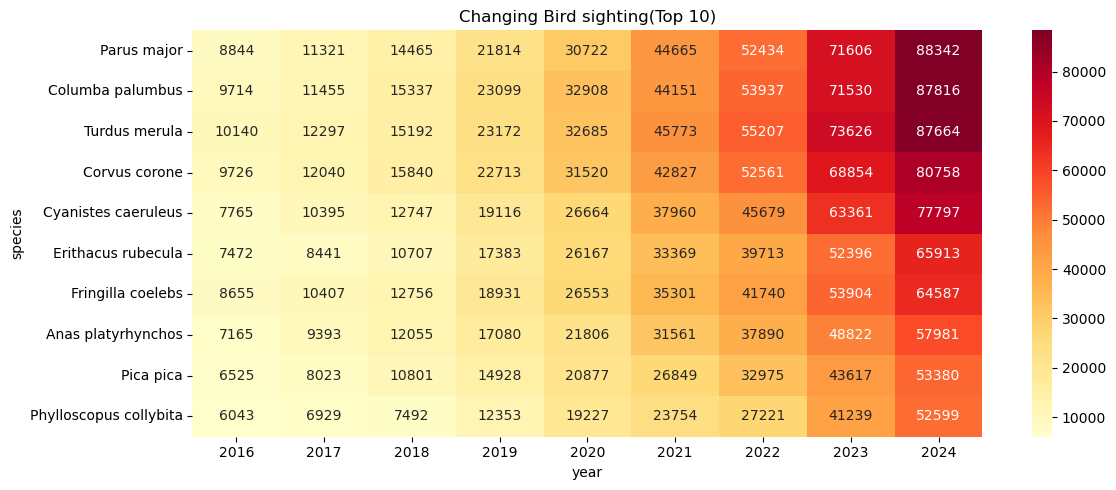

In [11]:
mpl.figure(figsize=(12,5))
sb.heatmap(hm,annot=True,fmt='.0f',cmap="YlOrRd")
mpl.title('Changing Bird sighting(Top 10)')
mpl.xlabel('year')
mpl.ylabel('species')
mpl.tight_layout()
mpl.show()